# Brandon Dix

# Astro 361 Lab 8

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit
import glob
import scipy
from astropy import table
import math

In [2]:
data_folder_1 = 'C:/Users/brand/Google Drive/UMich 2019/Astro 361/Lab 8/Anaconda/gala_yData_export/'
gal_files = glob.glob(data_folder_1 + "galpos*") #This command grabs all of the files starting with "sun_az" in your data folder.
calib_files = glob.glob(data_folder_1 + "calib_pole*") #This command grabs all of the files starting with "sun_az" in your data folder.

gal_files.sort() #Notably, the "glob" function does NOT sort the list it creates, so we do that here with the "sort" command
calib_files.sort()

In [3]:
gal_files

['C:/Users/brand/Google Drive/UMich 2019/Astro 361/Lab 8/Anaconda/gala_yData_export\\galpos00.dat',
 'C:/Users/brand/Google Drive/UMich 2019/Astro 361/Lab 8/Anaconda/gala_yData_export\\galpos10.dat',
 'C:/Users/brand/Google Drive/UMich 2019/Astro 361/Lab 8/Anaconda/gala_yData_export\\galpos20.dat',
 'C:/Users/brand/Google Drive/UMich 2019/Astro 361/Lab 8/Anaconda/gala_yData_export\\galpos30.dat',
 'C:/Users/brand/Google Drive/UMich 2019/Astro 361/Lab 8/Anaconda/gala_yData_export\\galpos40.dat',
 'C:/Users/brand/Google Drive/UMich 2019/Astro 361/Lab 8/Anaconda/gala_yData_export\\galpos50.dat',
 'C:/Users/brand/Google Drive/UMich 2019/Astro 361/Lab 8/Anaconda/gala_yData_export\\galpos60.dat',
 'C:/Users/brand/Google Drive/UMich 2019/Astro 361/Lab 8/Anaconda/gala_yData_export\\galpos70.dat',
 'C:/Users/brand/Google Drive/UMich 2019/Astro 361/Lab 8/Anaconda/gala_yData_export\\galpos80.dat',
 'C:/Users/brand/Google Drive/UMich 2019/Astro 361/Lab 8/Anaconda/gala_yData_export\\galpos90.dat']

In [4]:
calib_files

['C:/Users/brand/Google Drive/UMich 2019/Astro 361/Lab 8/Anaconda/gala_yData_export\\calib_pole.dat']

In [5]:
gal_array = [] # Create an empty array to later hold each of the spectra from the azimuthal scans

for gal_file in gal_files: #Pull each individual filename from the list of azimuth files
    
    with open(gal_file) as gal_data: #This opens up the file and puts each line into a list called az_data
        
        gal_rows = []    # We create a new empty list to put the rows with our spectral data into.
        
        for j, row in enumerate(gal_data, start=1): # enumerate() works a lot like range(). You get an index (j, here) which is iterated over, but you also get an object (row) corresponding to the items in the list you're iterating over (that is, inside this loop, row is the same as az_data[j])
            if j%4 == 0: # The operator "%" is called the modulus. It returns the remainder of a division (e.g. 6%4=2). So, by checking when j%4 is zero, we get every fourth row in the data (which is where our spectral data is).
                gal_rows.append(row) # Throw every fourth row into our list of spectral data.
                
        tot_gal = np.zeros(1024) #Create an array of 1024 0's.
        for row in gal_rows: 
            temp_spec = row.split(' ') # Our rows are actually strings. To break them up, we use the split() command, which splits a string into a list by grabbing each segment separated by the delimiter you put in the parentheses (e.g. If you do 'abc def ghi'.split(' '), you'll get the list [abc,def,ghi])
            spec = [] # Create an empty list to hold the spectral data
            for val in temp_spec: # Iterate over the elements of your split list.
                if val != '' and val != '\n': # This excludes some "nonsense" cases where elements in your split list are empty strings or end-of-line characters
                    spec.append(val) #Throw the values that are actually fluxes into your spectrum array.
                    
                    
            tot_gal = tot_gal + np.float64(spec) # Add the data from the current row to your total spectral data for this file.
            tot_gal = tot_gal / len(gal_rows)
        gal_array.append(tot_gal)

In [6]:
gal_array

[array([0.        , 0.        , 0.        , ..., 0.16252096, 0.16681818,
        0.16260804]),
 array([0.        , 0.        , 0.        , ..., 0.15882494, 0.15752635,
        0.15901582]),
 array([0.        , 0.        , 0.        , ..., 0.15299318, 0.15259189,
        0.15120257]),
 array([0.        , 0.        , 0.        , ..., 0.15854192, 0.15991284,
        0.16099329]),
 array([0.        , 0.        , 0.        , ..., 0.15906347, 0.16160977,
        0.15849528]),
 array([0.        , 0.        , 0.        , ..., 0.15957112, 0.16089136,
        0.15768065]),
 array([0.        , 0.        , 0.        , ..., 0.15964543, 0.16180707,
        0.16291144]),
 array([0.        , 0.        , 0.        , ..., 0.16377115, 0.16092052,
        0.1613685 ]),
 array([0.        , 0.        , 0.        , ..., 0.16166348, 0.16068731,
        0.16255369]),
 array([0.        , 0.        , 0.        , ..., 0.25401789, 0.25300884,
        0.24642108])]

In [7]:
calib_array = [] # Create an empty array to later hold each of the spectra from the azimuthal scans

for calib_file in calib_files: #Pull each individual filename from the list of azimuth files
    
    with open(calib_file) as calib_data: #This opens up the file and puts each line into a list called az_data
        
        calib_rows = []    # We create a new empty list to put the rows with our spectral data into.
        
        for j, row in enumerate(calib_data, start=1): # enumerate() works a lot like range(). You get an index (j, here) which is iterated over, but you also get an object (row) corresponding to the items in the list you're iterating over (that is, inside this loop, row is the same as az_data[j])
            if j%4 == 0: # The operator "%" is called the modulus. It returns the remainder of a division (e.g. 6%4=2). So, by checking when j%4 is zero, we get every fourth row in the data (which is where our spectral data is).
                calib_rows.append(row) # Throw every fourth row into our list of spectral data.
                
        tot_calib = np.zeros(1024) #Create an array of 1024 0's.
        for row in calib_rows: 
            temp_spec = row.split(' ') # Our rows are actually strings. To break them up, we use the split() command, which splits a string into a list by grabbing each segment separated by the delimiter you put in the parentheses (e.g. If you do 'abc def ghi'.split(' '), you'll get the list [abc,def,ghi])
            spec = [] # Create an empty list to hold the spectral data
            for val in temp_spec: # Iterate over the elements of your split list.
                if val != '' and val != '\n': # This excludes some "nonsense" cases where elements in your split list are empty strings or end-of-line characters
                    spec.append(val) #Throw the values that are actually fluxes into your spectrum array.
                    
                    
            tot_calib = tot_calib + np.float64(spec) # Add the data from the current row to your total spectral data for this file.
            tot_calib = tot_calib / len(calib_rows)
        calib_array.append(tot_calib)

In [8]:
calib_array

[array([0.        , 0.        , 0.        , ..., 0.07438342, 0.07374269,
        0.07568501])]

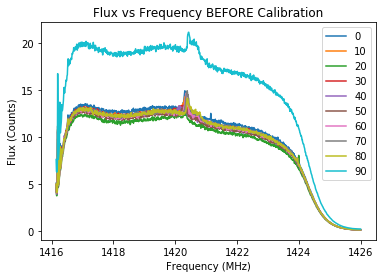

In [9]:
# galaxy data plot before calibration
frequency = np.arange(1416,1426,0.009766)

for i in range(0,len(gal_array)):
    plt.plot(frequency[15:],gal_array[i][15:], label = i*10)
    
plt.title('Flux vs Frequency BEFORE Calibration')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Flux (Counts)')
plt.legend()
plt.show()

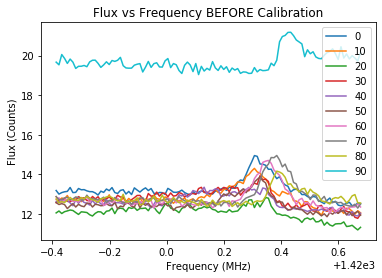

In [10]:
#zooming in BEFORE Calibration

frequency = np.arange(1416,1426,0.009766)
for i in range(0,len(gal_array)):
    plt.plot(frequency[370:480],gal_array[i][370:480], label = i*10)
    
plt.title('Flux vs Frequency BEFORE Calibration')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Flux (Counts)')
plt.legend()

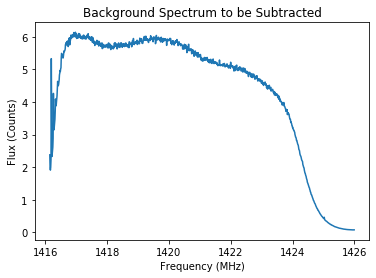

In [11]:
#background spectrum data to be subtracted

for i in range(len(calib_array)):
    calib_spectra_range = calib_array[i][15:]
    plt.plot(frequency[15:],calib_spectra_range)
  
plt.title('Background Spectrum to be Subtracted')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Flux (Counts)')
plt.show()  

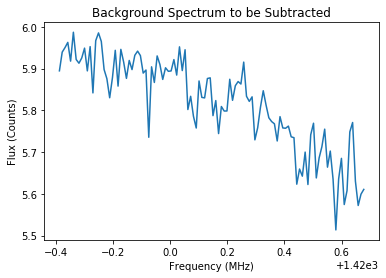

In [12]:
#zooming into same domain on background spectrum
for i in range(len(calib_array)):
    calib_spectra_range = calib_array[i][370:480]
    plt.plot(frequency[370:480],calib_spectra_range)
  
plt.title('Background Spectrum to be Subtracted')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Flux (Counts)')
plt.show()  

In [13]:
#now subtracting calibration values
gal_array = np.asarray(gal_array)
calib_array = np.asarray(calib_array)

gal_array_adjusted = gal_array - calib_array

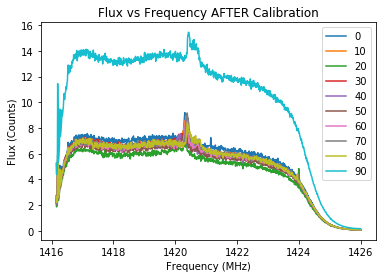

In [14]:
# galaxy data plot after calibration
frequency = np.arange(1416,1426,0.009766)
for i in range(0,len(gal_array_adjusted)):
    plt.plot(frequency[15:],gal_array_adjusted[i][15:], label = i*10)
    
plt.title('Flux vs Frequency AFTER Calibration')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Flux (Counts)')
plt.legend()

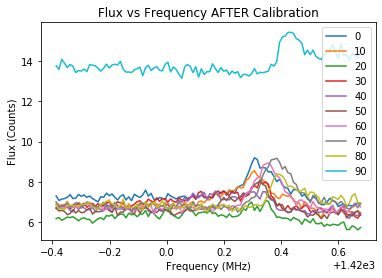

In [15]:
#zooming in

frequency = np.arange(1416,1426,0.009766)
for i in range(0,len(gal_array_adjusted)):
    plt.plot(frequency[370:480],gal_array_adjusted[i][370:480], label = i*10)
    
plt.title('Flux vs Frequency AFTER Calibration')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Flux (Counts)')
plt.legend()

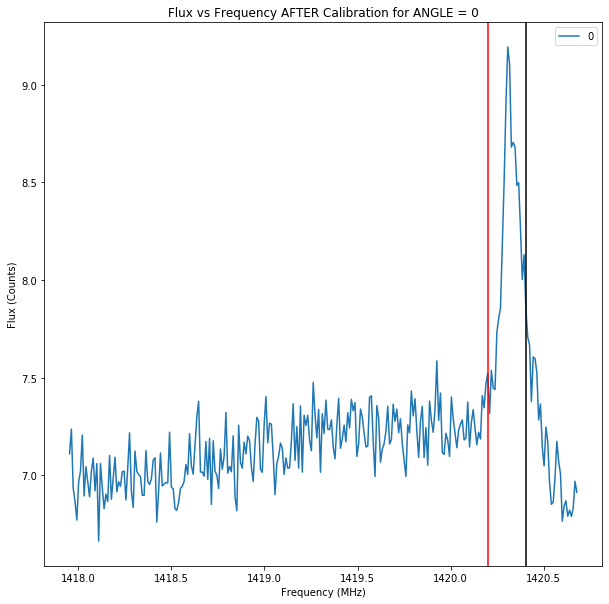

In [57]:
plt.plot(frequency[200:480],gal_array_adjusted[0][200:480], label = 0)
plt.title('Flux vs Frequency AFTER Calibration for ANGLE = 0')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Flux (Counts)')
plt.legend()
plt.axvline(x = 1420.2,color='r')
plt.axvline(x = 1420.405,color = 'k')

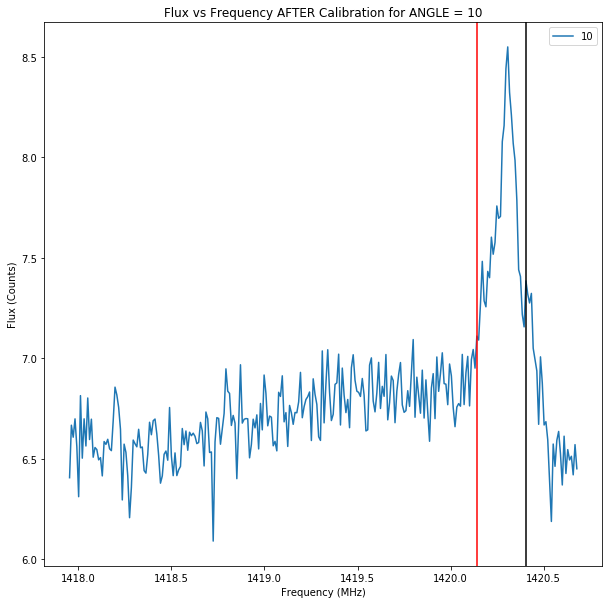

In [58]:
plt.plot(frequency[200:480],gal_array_adjusted[1][200:480], label = 10)
plt.title('Flux vs Frequency AFTER Calibration for ANGLE = 10')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Flux (Counts)')
plt.legend()
plt.axvline(x = 1420.14,color='r')
plt.axvline(x = 1420.405,color = 'k')

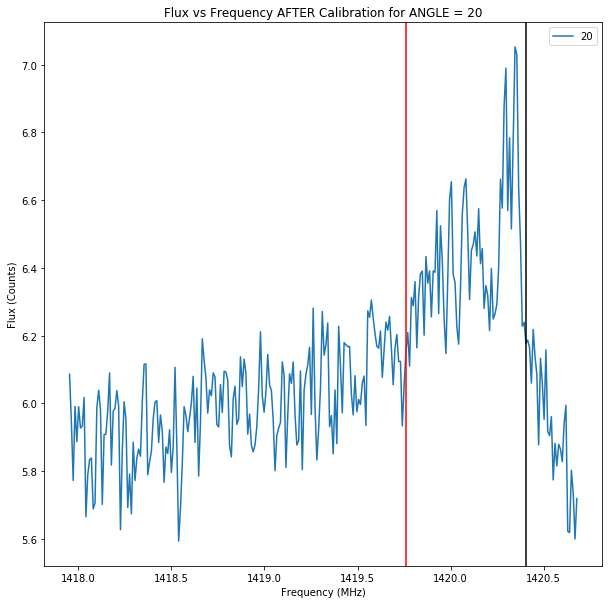

In [64]:
plt.plot(frequency[200:480],gal_array_adjusted[2][200:480], label = 20)
plt.title('Flux vs Frequency AFTER Calibration for ANGLE = 20')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Flux (Counts)')
plt.legend()
plt.axvline(x = 1419.76,color='r')
plt.axvline(x = 1420.405,color = 'k')

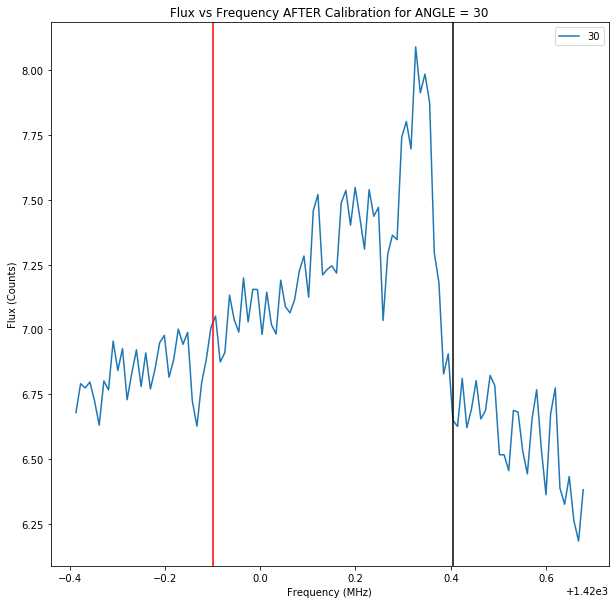

In [66]:
plt.plot(frequency[370:480],gal_array_adjusted[3][370:480], label = 30)
plt.title('Flux vs Frequency AFTER Calibration for ANGLE = 30')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Flux (Counts)')
plt.legend()
plt.axvline(x = 1419.9,color='r')
plt.axvline(x = 1420.405,color = 'k')

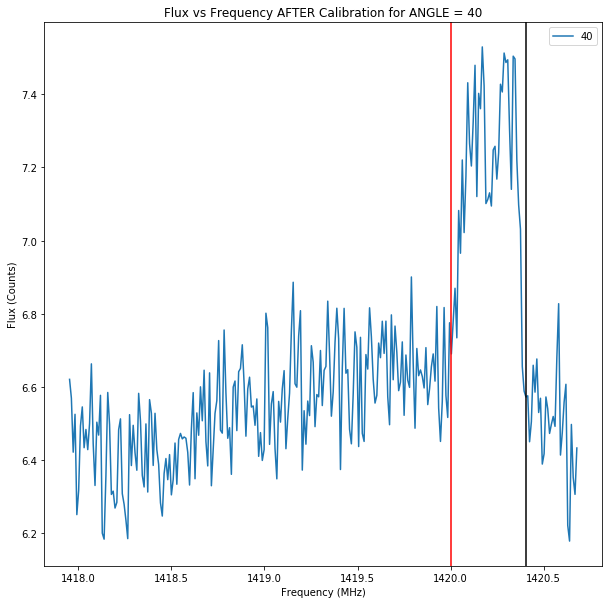

In [69]:
plt.plot(frequency[200:480],gal_array_adjusted[4][200:480], label = 40)
plt.title('Flux vs Frequency AFTER Calibration for ANGLE = 40')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Flux (Counts)')
plt.legend()
plt.axvline(x = 1420,color='r')
plt.axvline(x = 1420.405,color = 'k')

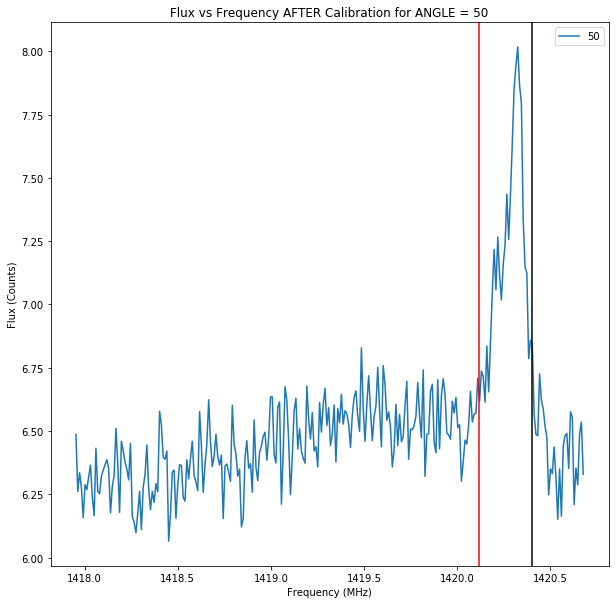

In [72]:
plt.plot(frequency[200:480],gal_array_adjusted[5][200:480], label = 50)
plt.title('Flux vs Frequency AFTER Calibration for ANGLE = 50')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Flux (Counts)')
plt.legend()
plt.axvline(x = 1420.12,color='r')
plt.axvline(x = 1420.405,color = 'k')

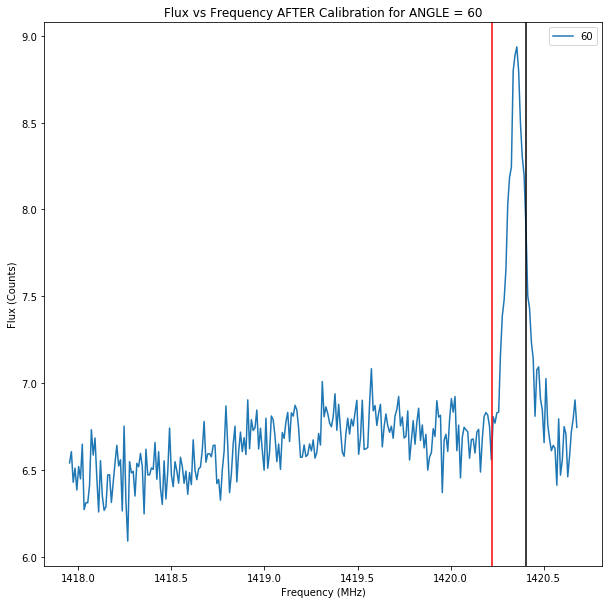

In [76]:
plt.plot(frequency[200:480],gal_array_adjusted[6][200:480], label = 60)
plt.title('Flux vs Frequency AFTER Calibration for ANGLE = 60')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Flux (Counts)')
plt.legend()
plt.axvline(x = 1420.22,color='r')
plt.axvline(x = 1420.405,color = 'k')

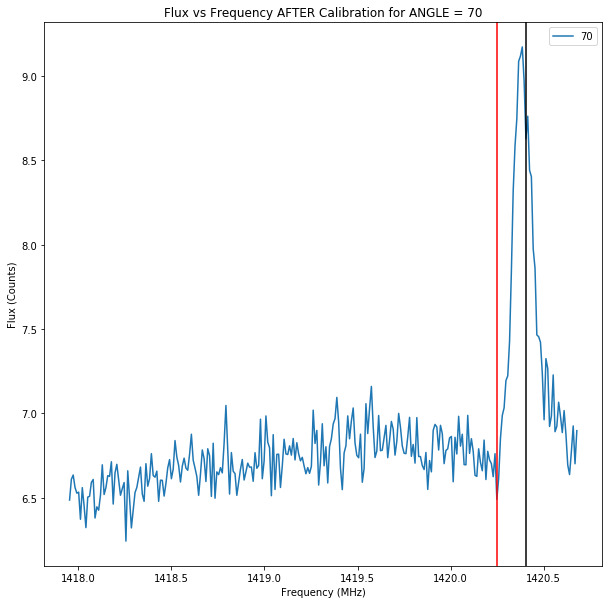

In [77]:
plt.plot(frequency[200:480],gal_array_adjusted[7][200:480], label = 70)
plt.title('Flux vs Frequency AFTER Calibration for ANGLE = 70')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Flux (Counts)')
plt.legend()
plt.axvline(x = 1420.25,color='r')
plt.axvline(x = 1420.405,color = 'k')

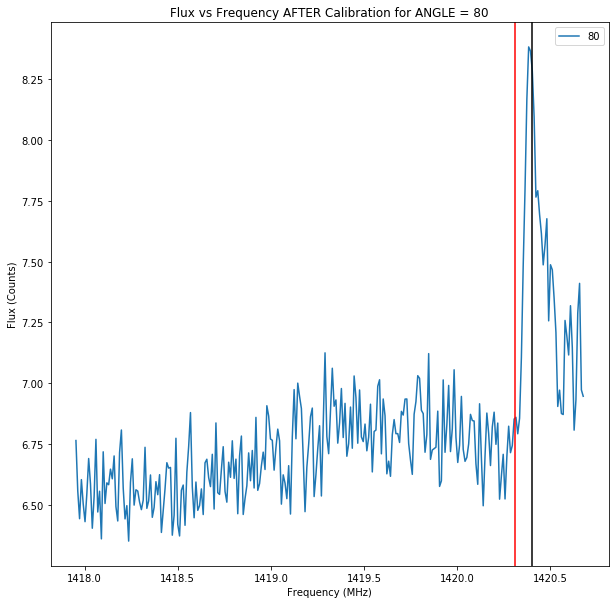

In [127]:
plt.plot(frequency[200:480],gal_array_adjusted[8][200:480], label = 80)
plt.title('Flux vs Frequency AFTER Calibration for ANGLE = 80')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Flux (Counts)')
plt.legend()
plt.axvline(x = 1420.31,color='r')
plt.axvline(x = 1420.405,color = 'k')

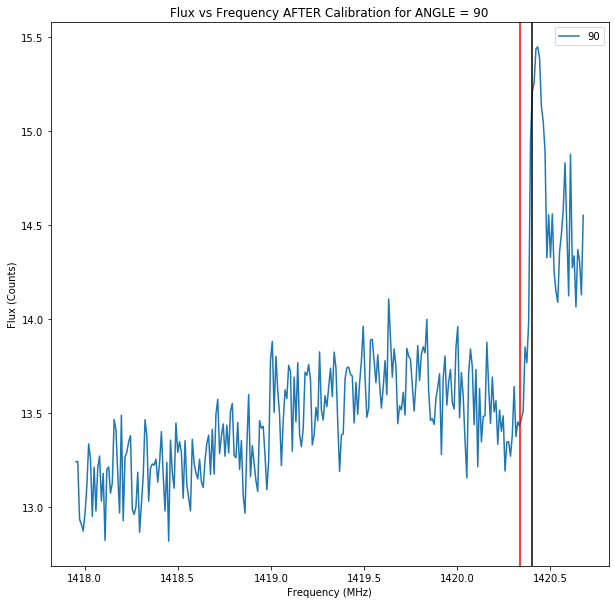

In [104]:
plt.plot(frequency[200:480],gal_array_adjusted[9][200:480], label = 90)
plt.title('Flux vs Frequency AFTER Calibration for ANGLE = 90')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Flux (Counts)')
plt.legend()
plt.axvline(x = 1420.34,color='r')
plt.axvline(x = 1420.405,color = 'k')

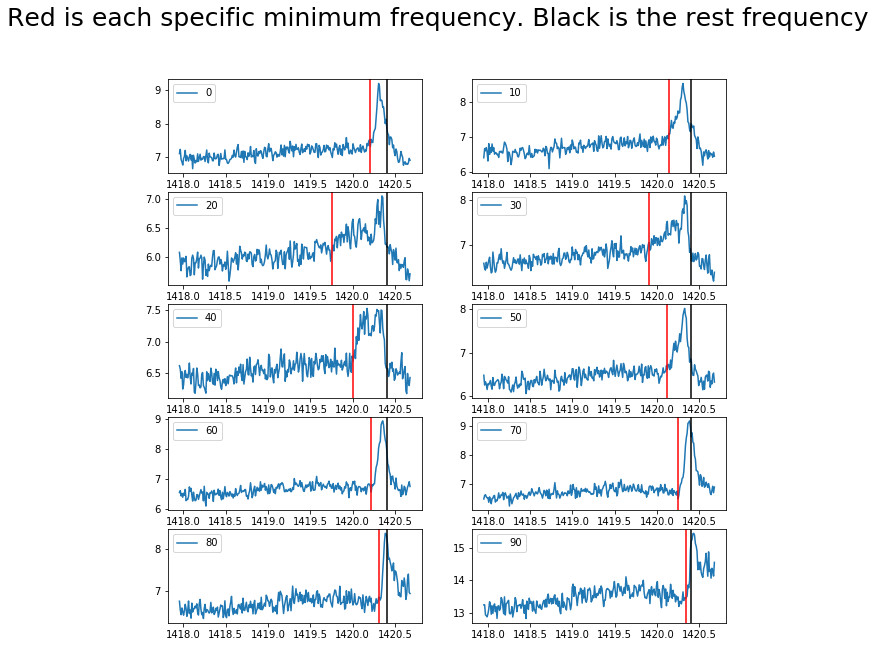

In [128]:
plt.rcParams["figure.figsize"] = (10,10)

plt.subplot(5,2,1)
plt.plot(frequency[200:480],gal_array_adjusted[0][200:480], label = 0)
plt.axvline(x=1420.405,color='k')
plt.axvline(x=1420.2,color='r')
plt.legend()

plt.subplot(5,2,2)
plt.plot(frequency[200:480],gal_array_adjusted[1][200:480], label = 10)
plt.axvline(x=1420.405,color='k')
plt.axvline(x=1420.14,color='r')
plt.legend()

plt.subplot(5,2,3)
plt.plot(frequency[200:480],gal_array_adjusted[2][200:480], label = 20)
plt.axvline(x=1420.4057517667,color='k')
plt.axvline(x=1419.76,color='r')
plt.legend()

plt.subplot(5,2,4)
plt.plot(frequency[200:480],gal_array_adjusted[3][200:480], label = 30)
plt.axvline(x=1420.405,color='k')
plt.axvline(x=1419.9,color='r')
plt.legend()

plt.subplot(5,2,5)
plt.plot(frequency[200:480],gal_array_adjusted[4][200:480], label = 40)
plt.axvline(x=1420.405,color='k')
plt.axvline(x=1420.0,color='r')
plt.legend()

plt.subplot(5,2,6)
plt.plot(frequency[200:480],gal_array_adjusted[5][200:480], label = 50)
plt.axvline(x=1420.405,color='k')
plt.axvline(x=1420.12,color='r')
plt.legend()

plt.subplot(5,2,7)
plt.plot(frequency[200:480],gal_array_adjusted[6][200:480], label = 60)
plt.axvline(x=1420.405,color='k')
plt.axvline(x=1420.22,color='r')
plt.legend()

plt.subplot(5,2,8)
plt.plot(frequency[200:480],gal_array_adjusted[7][200:480], label = 70)
plt.axvline(x=1420.405,color='k')
plt.axvline(x=1420.25,color='r')
plt.legend()

plt.subplot(5,2,9)
plt.plot(frequency[200:480],gal_array_adjusted[8][200:480], label = 80)
plt.axvline(x=1420.405,color='k')
plt.axvline(x=1420.31,color='r')
plt.legend()

plt.subplot(5,2,10)
plt.plot(frequency[200:480],gal_array_adjusted[9][200:480], label = 90)
plt.axvline(x=1420.405,color='k')
plt.axvline(x=1420.34,color='r')
plt.legend()

plt.suptitle('Red is each specific minimum frequency. Black is the rest frequency',fontsize=25)
plt.show()

Text(0, 0.5, 'Frequency (MHz)')

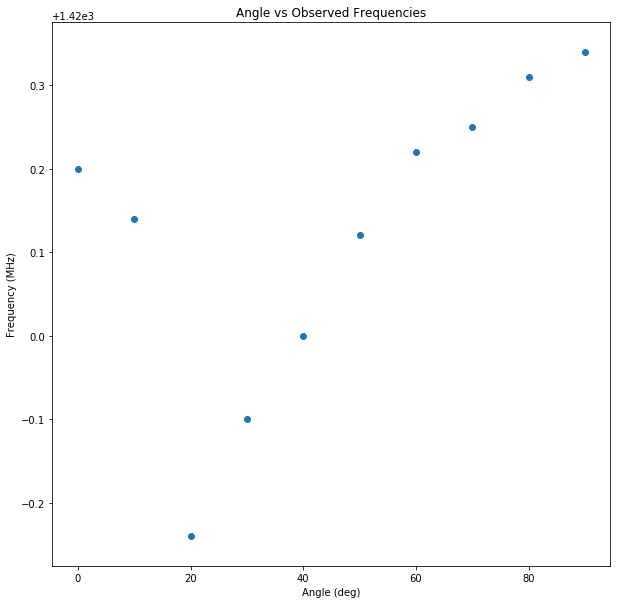

In [129]:
angle_array = [0,10,20,30,40,50,60,70,80,90]
freq_obs_array = [1420.2,1420.14,1419.76,1419.9,1420,1420.12,1420.22,1420.25,1420.31,1420.34] #hardcoded from above plots

plt.scatter(angle_array,freq_obs_array)
plt.title('Angle vs Observed Frequencies')
plt.xlabel('Angle (deg)')
plt.ylabel('Frequency (MHz)')

In [143]:
#Using dopplerV = c * (1 - (f / Vobs))  to find Doppler Velocity

dopplerV = []

for i in range(0, 10):
    dopplerV.append ((2.99*10**5) * (1 - (freq_obs_array[i] / 1420.41)))
    
dopplerV

[44.2055462859392,
 56.835702367617145,
 136.82669088503252,
 107.35632669439532,
 86.30606655825434,
 61.04575439489845,
 39.995494258724285,
 33.68041621788531,
 21.05026013617417,
 14.735182095335198]

Text(0, 0.5, 'Doppler Velocity (km/s)')

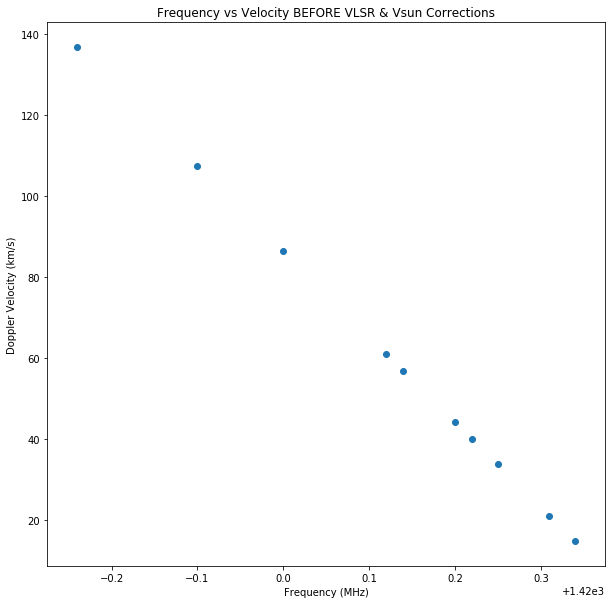

In [131]:
plt.scatter(freq_obs_array,dopplerV)
plt.title('Frequency vs Velocity BEFORE VLSR & Vsun Corrections')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Doppler Velocity (km/s)')

In [132]:
#accounting for VLSR

VLSR_array = [10.48, 9.86, 8.96, 7.77, 6.33, 4.7, 2.93, 1.07, -0.82, -2.68]
VLSR_accounted = []


for i in range (0,10):
    VLSR_accounted.append (dopplerV[i] + VLSR_array[i])
    
VLSR_accounted

[54.685546285939196,
 66.69570236761714,
 145.78669088503253,
 115.12632669439532,
 92.63606655825434,
 65.74575439489846,
 42.925494258724285,
 34.75041621788531,
 20.23026013617417,
 12.055182095335198]

In [133]:
#adding the Vmax_sun_component for each theta
#V_sun = 255*sin(lat)

V_sun = []

for i in range (0,10):
    V_sun.append (255 * math.sin(math.radians(angle_array[i])))

V_sun

[0.0,
 44.28028530506723,
 87.21513654804552,
 127.49999999999999,
 163.9108404700675,
 195.3413329953394,
 220.83647796503183,
 239.62161830040662,
 251.12597701811305,
 255.0]

In [134]:
V_corrected = []
for i in range (0,10):
    V_corrected.append (VLSR_accounted[i] + V_sun[i])
V_corrected

[54.685546285939196,
 110.97598767268437,
 233.00182743307806,
 242.6263266943953,
 256.54690702832187,
 261.08708739023785,
 263.7619722237561,
 274.3720345182919,
 271.3562371542872,
 267.0551820953352]

Text(0, 0.5, 'Corrected Velocity (km/s)')

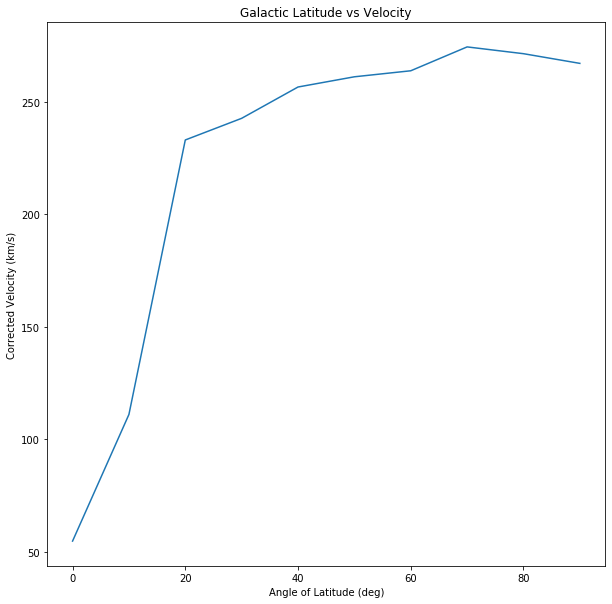

In [135]:
plt.plot(angle_array,V_corrected)
plt.title('Galactic Latitude vs Velocity')
plt.xlabel('Angle of Latitude (deg)')
plt.ylabel('Corrected Velocity (km/s)')

In [136]:
# changing angles of latitude into distance
# tangential distance in kpc

distance_kpc = []

for i in range (0,10):
    distance_kpc.append (((math.sin(math.radians(angle_array[i])) * 8.340)))
distance_kpc #in kpc

[0.0,
 1.448225801742199,
 2.852447995336077,
 4.169999999999999,
 5.360848664785737,
 6.388810655612277,
 7.2226518675622176,
 7.8370364573544755,
 8.213296660121815,
 8.34]

<ErrorbarContainer object of 3 artists>

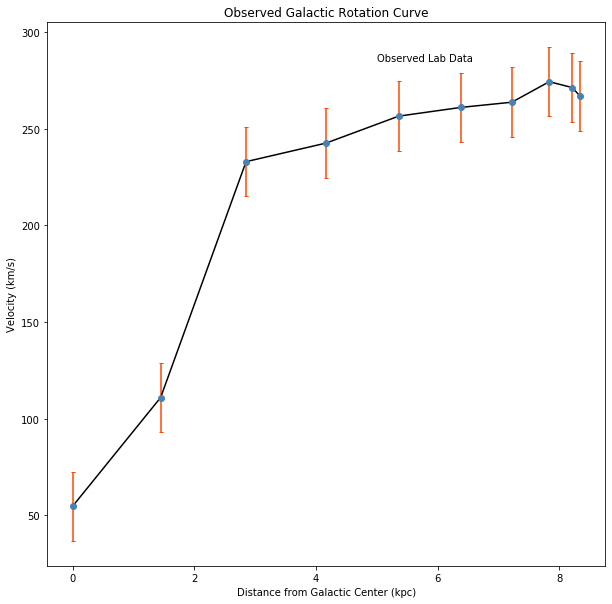

In [162]:
plt.plot(distance_kpc,V_corrected, 'k') #my data


plt.rcParams["figure.figsize"] = (10,10)
plt.annotate('Observed Lab Data', xy = (5,285), fontsize = 10)
plt.xlabel('Distance from Galactic Center (kpc)')
plt.ylabel('Velocity (km/s)')
plt.title('Observed Galactic Rotation Curve')
plt.errorbar(distance_kpc, V_corrected, yerr=18, fmt='o', ecolor='orangered', color='steelblue', capsize=2)
    #using yerr of 18 because the mean velocity is around 180km/s and 10% error would be +-18 km/s which is shown
    #I could not figure out how to do percent error bars, only y value error. So the average worked best for representation